<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT084_2021S1_T2__predicao_BERTINI_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T2
```

## **Atividade predição**

Considerando o conjunto de dados [Boston](http://lib.stat.cmu.edu/datasets/boston),
da biblioteca MASS no R, que registra informações coletadas pelo Census dos EUA a respeito de moradia na área de Boston. Vamos prever **medv** (média do valor de uma casa em 1,ooo USD) usando os 13 atributos que descrevem os dados.

Para que possamos comparar os modelos obtidos, vamos deixar parte do conjunto para ser usado como validação – somente no item **(d)**. Portanto, divida o conjunto em dois, um contendo 100 instâncias para ser usada como teste e o outro com 406, para usar como treino. Para os itens **(a)**, **(b)** e **(c)** somente o conjunto de treino deve ser usado.

Considere somente modelos lineares.

**(a)** Use a função regsubsets() para encontrar o melhor conjunto de  atributos. Qual é o melhor modelo de acordo com as medidas **Cp**, **BIC**, and **R2** ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.

**(b)** Repita o procedimento em **(a)**, usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item **(a)**?

**(c)** Realize a seleção de variáveis e de modelos usando validação cruzada no
conjunto de treino.

**(d)** Compare os modelos obtidos nos items **(a)**, **(b)** e **(c)** no conjunto de teste. Qual deles é o melhor?

Entregar somente um relatório detalhando o que foi feito.


### **Instalando dependências para os pacotes**

Material Consultado:
*   https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497
*   https://www.rdocumentation.org/packages/leaps/versions/3.1/topics/regsubsets
*   https://rpubs.com/andrehofreire/LinearRegressionR
*   http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/
*   https://rstudio-pubs-static.s3.amazonaws.com/117080_1924569ef91b426c8ea7bff8dcbaf4f3.html


```
# install.packages('caret', dependencies = TRUE)
# install.packages('leaps', dependencies = TRUE)
# install.packages('RCurl', dependencies = TRUE)

# Pacotes Instalados
str (allPackage <- installed.packages ())
allPackage [, c (1,3: 5)]

# Pacotes Disponiveis
library()
```



### **Carregando pacotes R necessários**


*   **tidyverse**: para fácil manipulação e visualização de dados
*   **caret**: para um fluxo de trabalho fácil de aprendizado de máquina
*   **leaps**: para calcular a regressão dos melhores subconjuntos
*   **RCurl**: para carregamento do conjunto de dados

In [135]:
library(tidyverse)
library(caret)
library(leaps)
library(RCurl)
library(ggplot2)

### **Carregando Conjunto de Dados**

In [111]:
boston <-read.csv(text=getURL('https://raw.githubusercontent.com/SamuelOliveira/Colab/main/boston.csv'))
# head(boston)

### **Criando Subconjuntos**

*   Treino (406 amostras)
*   Teste (100 amostras) 

In [112]:
split <-sample(nrow(boston), 100)
test  <-boston[split,]
train <-boston[-split,]

### **Eliminando variável MEDV**

Vamos eliminar a variável "MEDV" e visualizar a estrutura das colunas restantes que utilizaremos para o modelo.

In [113]:
model_train <-regsubsets(MEDV~., data=train, nvmax=13)
res.sum     <-summary(model_train)
res.sum

Subset selection object
Call: regsubsets.formula(MEDV ~ ., data = train, nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
CRIM        FALSE      FALSE
ZN          FALSE      FALSE
INDUS       FALSE      FALSE
CHAS        FALSE      FALSE
NOX         FALSE      FALSE
RM          FALSE      FALSE
AGE         FALSE      FALSE
DIS         FALSE      FALSE
RAD         FALSE      FALSE
TAX         FALSE      FALSE
PTRATIO     FALSE      FALSE
B           FALSE      FALSE
LSTAT       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          CRIM ZN  INDUS CHAS NOX RM  AGE DIS RAD TAX PTRATIO B   LSTAT
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " " "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " " "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " " "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " " "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*" " " "*" " " " " "

### **Análise Exploratória**
Vamos realizar uma breve análise exploratória para visualizar algumas característica relevantes dos dados.

Com o histograma podemos ver a distribuição de frequência dos dados

In [1]:
# ggplot(df, aes(X, fill = group)) + geom_histogram() +
#     scale_fill_manual(values = c("0-2" = "#CD7F32",
#                                  "3-6" = "#C0C0C0",
#                                  "7-10" = "gold"))
# dataset:
# df=regsubsets(model_train)

# p <- ggplot(df, aes(x=value)) + geom_histogram()
# x<-rnorm(1000)
# df<-data.frame(x)
# ggplot(df,aes(x))+geom_histogram(bins=10,fill=1:10)
# ggplot(df, aes(x, fill = group)) + geom_histogram() +
#     scale_fill_manual(values = c("0-2" = "#CD7F32",
#                                  "3-6" = "#C0C0C0",
#                                  "7-10" = "gold"))

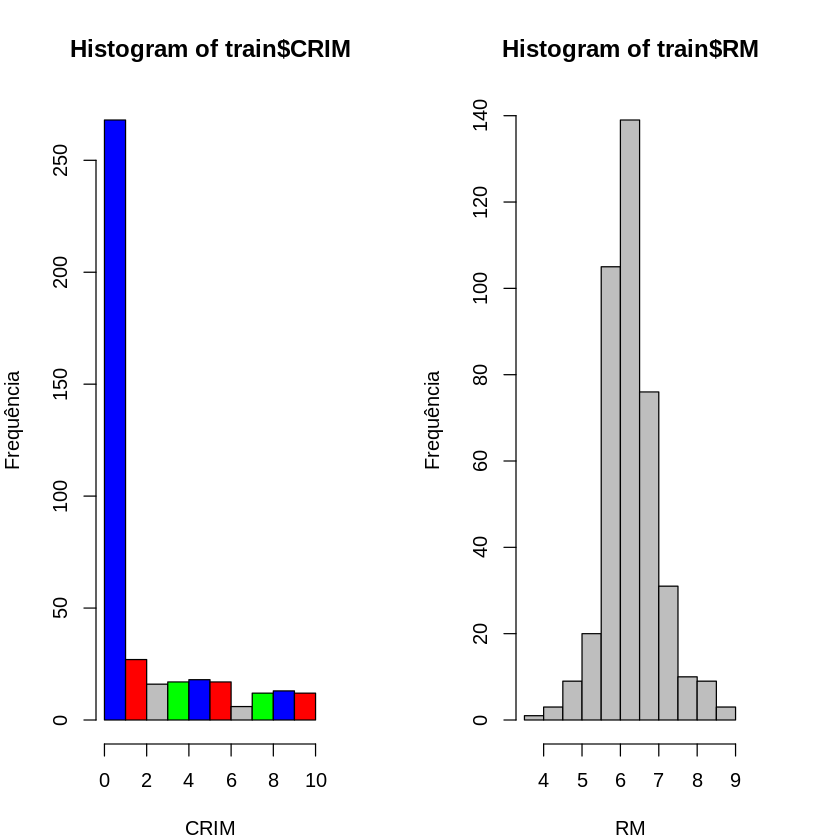

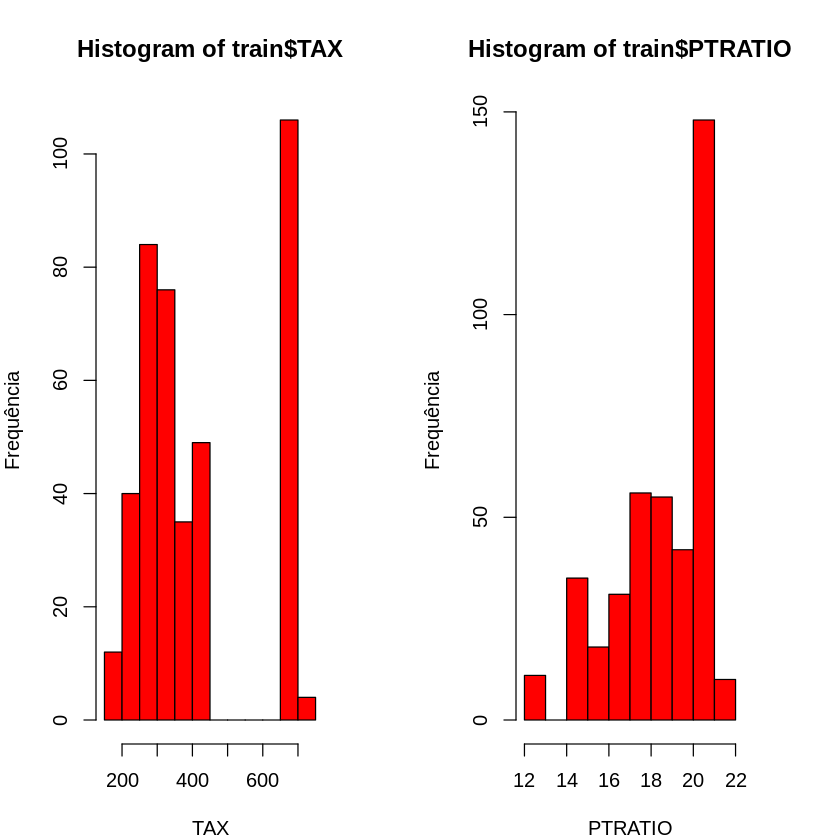

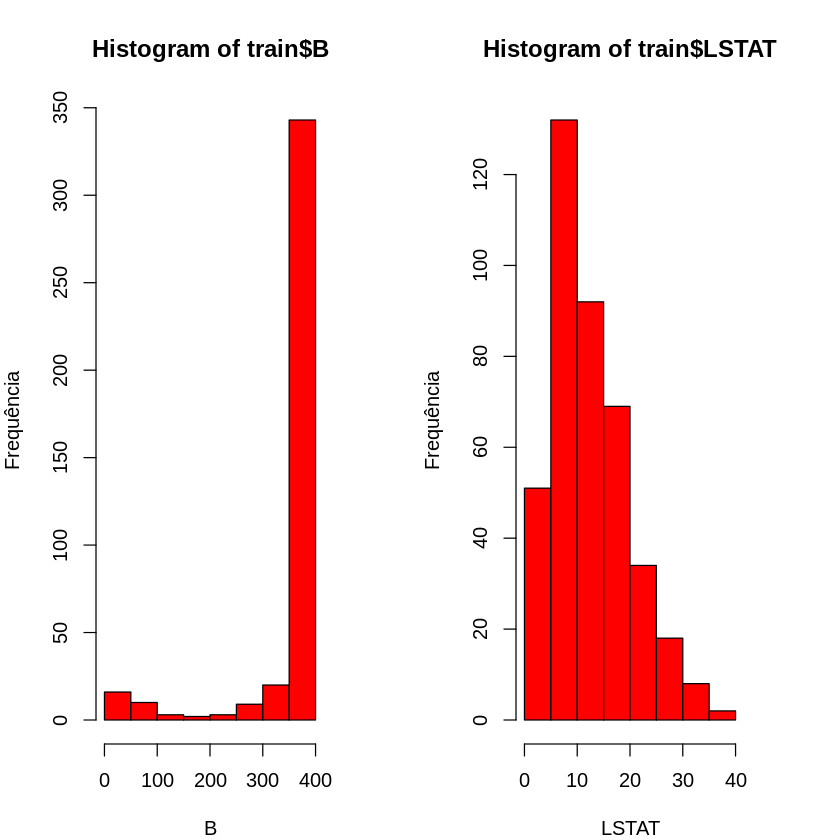

In [132]:
par(mfrow = c(1,2), mar = c(4,4,4,4))
hist(x = train$CRIM, xlab = "CRIM", ylab = "Frequência", col = c("blue", "red", "gray", "green"))
hist(x = train$RM, xlab = "RM", ylab = "Frequência", col = "gray")
hist(x = train$TAX, xlab = "TAX", ylab = "Frequência", col = "red")
hist(x = train$PTRATIO, xlab = "PTRATIO", ylab = "Frequência", col = "red")
hist(x = train$B, xlab = "B", ylab = "Frequência", col = "red")
hist(x = train$LSTAT, xlab = "LSTAT", ylab = "Frequência", col = "red")

**(a)** Use a função regsubsets() para encontrar o melhor conjunto de  atributos. Qual é o melhor modelo de acordo com as medidas **Cp**, **BIC**, and **R2** ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.

In [115]:
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2,CP,BIC
<int>,<int>,<int>
10,9,6


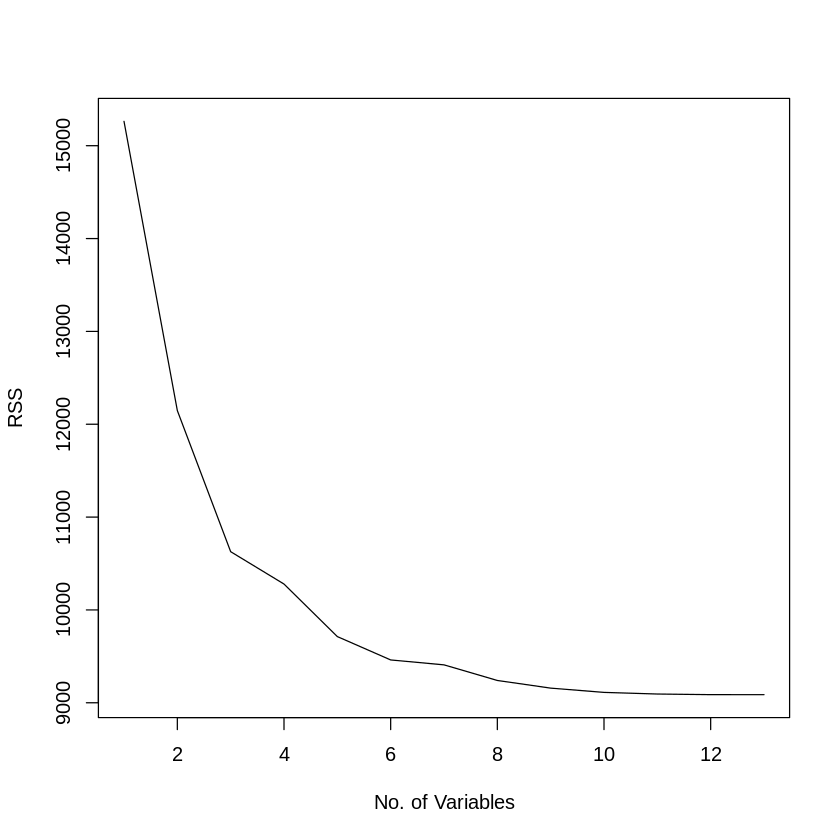

In [116]:
plot(res.sum$rss,xlab='No. of Variables',ylab='RSS',type='l')

Com isso em mente, realizaremos gráficos para r ao quadrado ajustado, Cp e Critério de Informação Bayesiano. Uma vez plotados, podemos determinar os melhores modelos para cada método usando o melhor desempenho com a menor quantidade de variáveis. Para o r quadrado ajustado, usaremos o maior valor, enquanto para os outros será usado o menor valor. Depois, podemos comparar os resultados para determinar o melhor número de variáveis ​​comuns usadas.

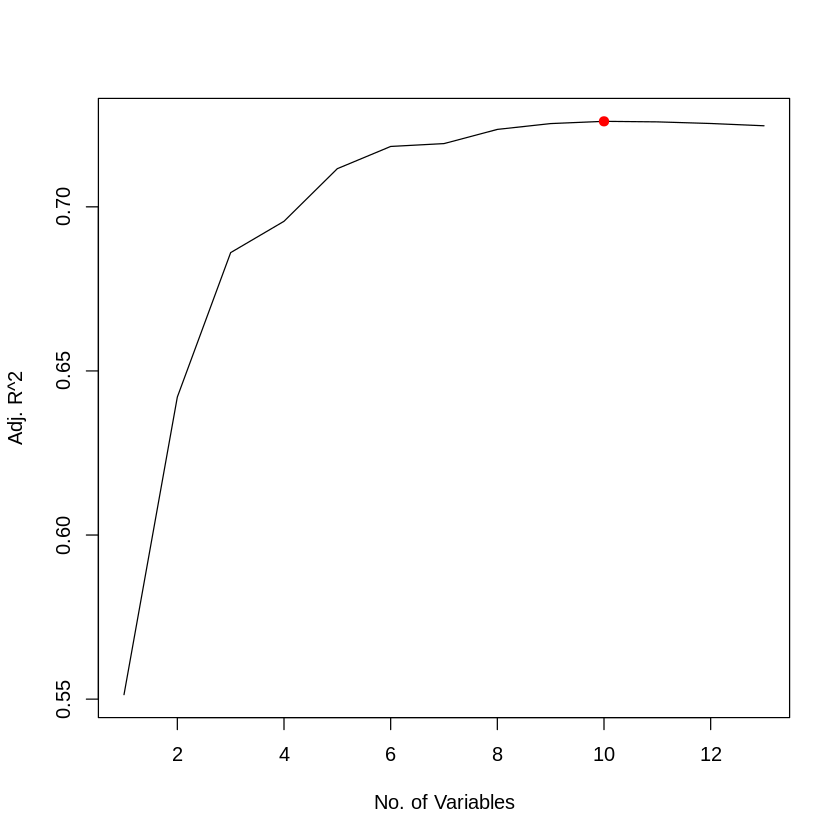

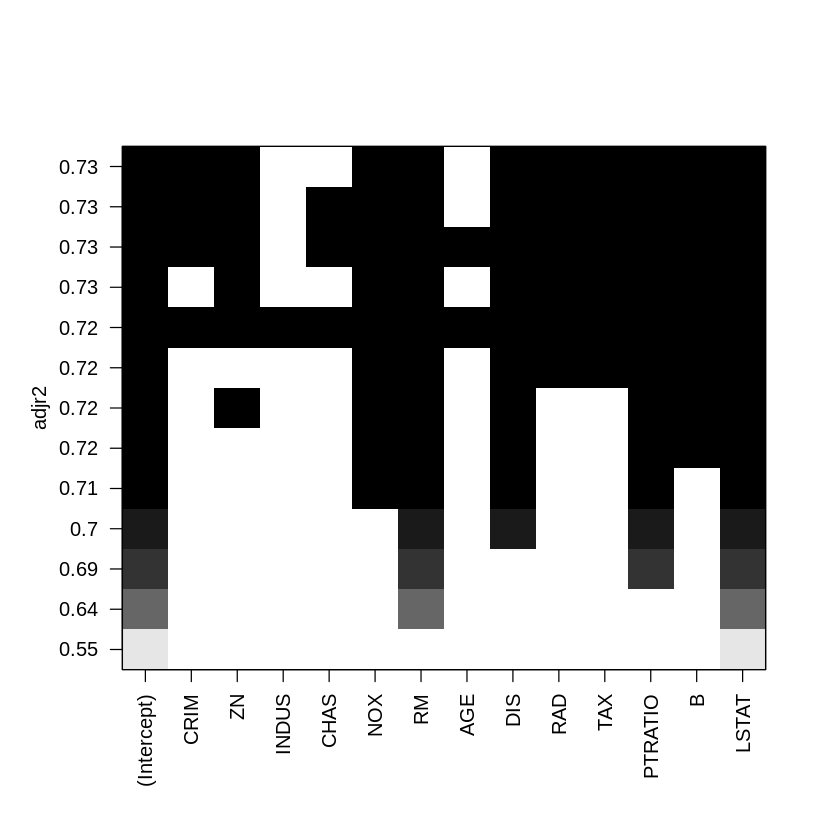

In [117]:
plot(res.sum$adjr2,xlab='No. of Variables',ylab='Adj. R^2',type='l')
max_p = which.max(res.sum$adjr2)
points(max_p,res.sum$adjr2[max_p],pch=19,col='red')
plot(model_train,scale='adjr2')

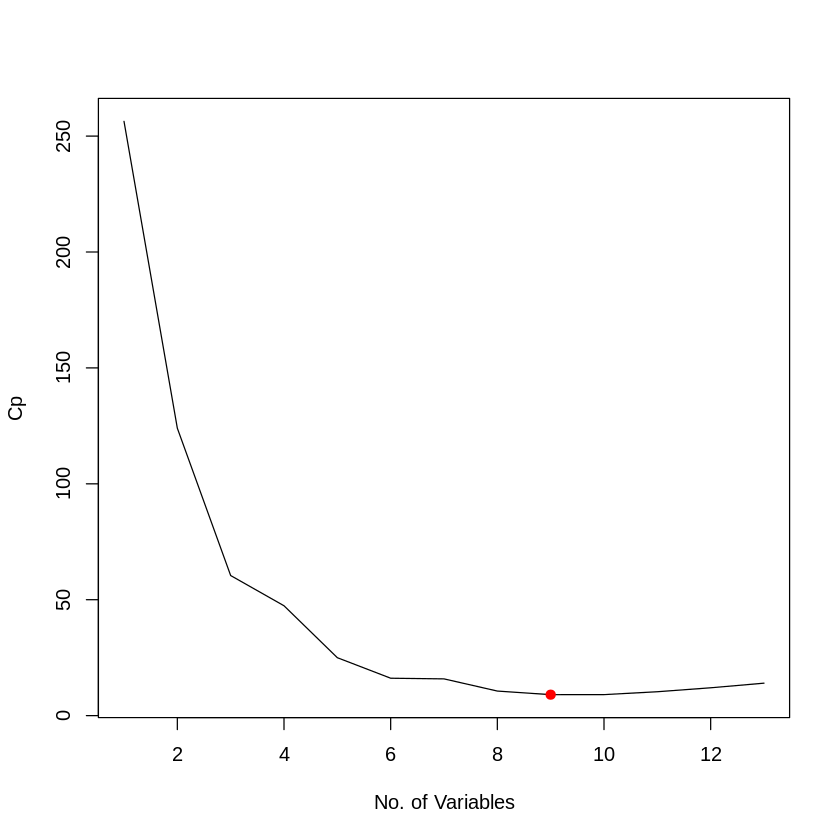

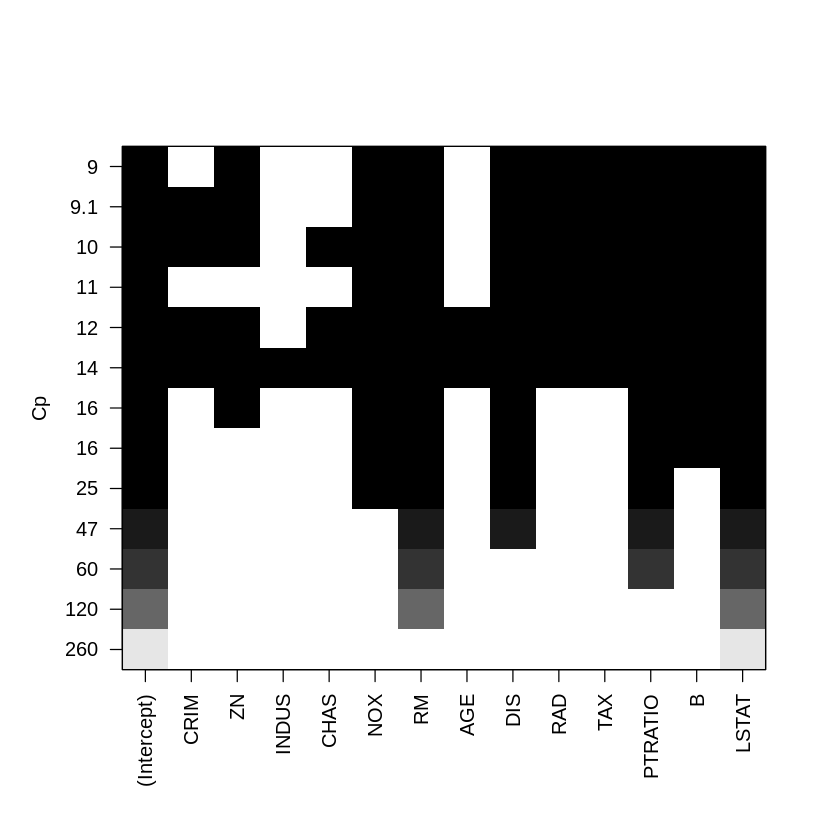

In [118]:
plot(res.sum$cp,xlab='No. of Variables',ylab='Cp',type='l')
min_p = which.min(res.sum$cp)
points(min_p,res.sum$cp[min_p],pch=19,col='red')
plot(model_train,scale='Cp')

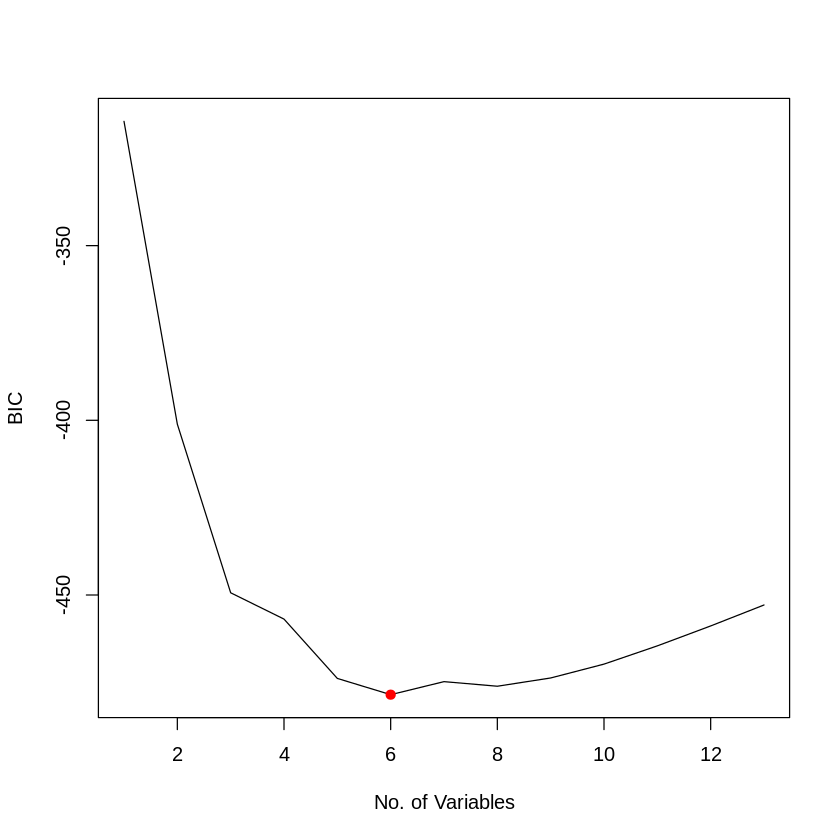

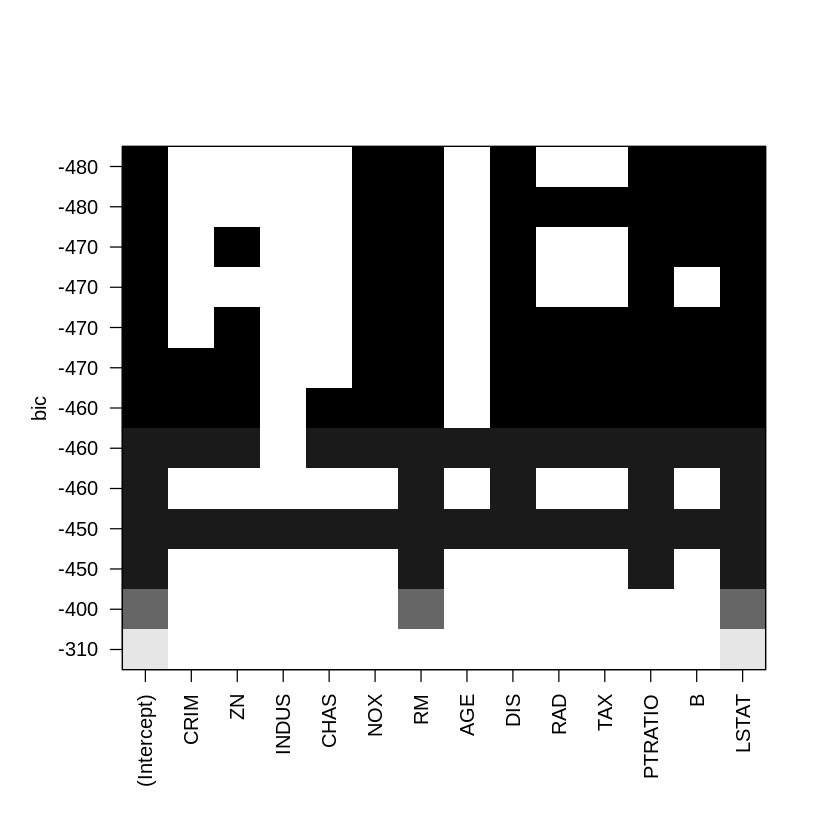

In [119]:
plot(res.sum$bic,xlab='No. of Variables',ylab='BIC',type='l')
min_p = which.min(res.sum$bic)
points(min_p,res.sum$bic[min_p],pch=19,col='red')
plot(model_train,scale='bic')

Para nossos propósitos, usaremos quatro variáveis: ?

In [120]:
coef(model_train,which.max(res.sum$adjr2))

(Intercept)         CRIM           ZN          NOX           RM          DIS 
 34.39923426  -0.24471601   0.03201422 -12.96256691   3.97359546  -1.32722574 
         RAD          TAX      PTRATIO            B        LSTAT 
  0.27257980  -0.01188686  -1.05577768   0.01039517  -0.52499640

**(b)** Repita o procedimento em **(a)**, usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item **(a)**?

Além dos métodos anteriores, também podemos usar a seleção progressiva para a frente ou para trás. Novamente, usaremos a função regsubsets (), mas teremos que especificar o método em uso.

In [121]:
model_train.fwd <- regsubsets(MEDV~.,data=train,nvmax=13,method='forward')
summary(model_train.fwd)

Subset selection object
Call: regsubsets.formula(MEDV ~ ., data = train, nvmax = 13, method = "forward")
13 Variables  (and intercept)
        Forced in Forced out
CRIM        FALSE      FALSE
ZN          FALSE      FALSE
INDUS       FALSE      FALSE
CHAS        FALSE      FALSE
NOX         FALSE      FALSE
RM          FALSE      FALSE
AGE         FALSE      FALSE
DIS         FALSE      FALSE
RAD         FALSE      FALSE
TAX         FALSE      FALSE
PTRATIO     FALSE      FALSE
B           FALSE      FALSE
LSTAT       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: forward
          CRIM ZN  INDUS CHAS NOX RM  AGE DIS RAD TAX PTRATIO B   LSTAT
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " " "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " " "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " " "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " " "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*" 

In [122]:
model_train.bwk <- regsubsets(MEDV~.,data=train,nvmax=13,method='backward')
summary(model_train.bwk)

Subset selection object
Call: regsubsets.formula(MEDV ~ ., data = train, nvmax = 13, method = "backward")
13 Variables  (and intercept)
        Forced in Forced out
CRIM        FALSE      FALSE
ZN          FALSE      FALSE
INDUS       FALSE      FALSE
CHAS        FALSE      FALSE
NOX         FALSE      FALSE
RM          FALSE      FALSE
AGE         FALSE      FALSE
DIS         FALSE      FALSE
RAD         FALSE      FALSE
TAX         FALSE      FALSE
PTRATIO     FALSE      FALSE
B           FALSE      FALSE
LSTAT       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: backward
          CRIM ZN  INDUS CHAS NOX RM  AGE DIS RAD TAX PTRATIO B   LSTAT
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " " "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " " "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " " "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " " "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*

In [123]:
coef(model_train.fwd,which.max(res.sum$adjr2))

(Intercept)            ZN         INDUS           NOX            RM 
 35.891803978   0.031345780   0.008385739 -14.246372867   3.913180934 
          DIS           RAD           TAX       PTRATIO             B 
 -1.326030709   0.224072680  -0.012321757  -1.060813081   0.010198524 
        LSTAT 
 -0.534021977

In [124]:
coef(model_train.bwk,which.max(res.sum$adjr2))

(Intercept)         CRIM           ZN          NOX           RM          DIS 
 34.39923426  -0.24471601   0.03201422 -12.96256691   3.97359546  -1.32722574 
         RAD          TAX      PTRATIO            B        LSTAT 
  0.27257980  -0.01188686  -1.05577768   0.01039517  -0.52499640

Como não há uma função predict () já conectada com regsubsets, Witten et al forneceram a função a seguir. Esta função será utilizada quando a validação cruzada for usada para determinar o melhor modelo.

In [125]:
predict.regsubsets <-function(object,newdata,id,...)
{
  form  <-as.formula(object$call[[2]])
  mat   <-model.matrix(form,newdata)
  coefi <- coef(object,id=id)
  xvars <- names(coefi)
  mat[,xvars]%*%coefi
}

Para validação cruzada de 10 vezes, o conjunto de dados é sistematicamente separado em conjuntos de treinamento e teste. Os erros quadráticos médios são então registrados para cada tamanho de modelo. As médias para cada tamanho são então obtidas.

In [126]:
# k <- 10
# folds <- sample(1:k,nrow(retinol),replace=T)
# cv.errors <- matrix(NA,k,13,dimnames=list(NULL,paste(1:13)))
# for(j in 1:k){
#     ## Training set
#     best.fit <- regsubsets(retplasma~.,data=retinol[folds != j,],nvmax=13)
#         for(i in 1:13){
#             pred <- predict.regsubsets(best.fit,retinol[folds == j,],id=i)
#             cv.errors[j,i] <- mean((retinol$retplasma[folds==j] - pred)^2)
#             }
#     }
# mean.cv.errors <- apply(cv.errors,2,mean)

Agora podemos plotar os erros e determinar quantas variáveis ​​podemos selecionar para o modelo com este método.

In [128]:
# plot(mean.cv.errors,type='b')

Aqui, um argumento pode ser feito para usar um modelo de três variáveis. Os coeficientes dessas variáveis ​​são anotados a seguir.

In [ ]:
# ret.full.cv <- regsubsets(retplasma~.,data=retinol,nvmax=13)
# coef(ret.full.cv,3)